In [1]:
# This project involves building a simple search engine for an encyclopedia focused on Earth-related topics, using data from a Wikipedia article about the Ozone Layer. Below, I'll outline the steps and provide code snippets for each part of the process.

### Step 1: Retrieve Article Content

# We'll start by creating a function to retrieve the content of the Wikipedia article using the Wikipedia API.

# ```python
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Retrieve Article Content
def get_content(article_name):
    url = f"https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": article_name,
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "*",
        "formatversion": 2
    }
    response = requests.get(url, params=params)
    return response.json()

In [2]:
### Step 2: Merge Contents

# Next, we need to extract the relevant content from the JSON response.

# Step 2: Merge Contents
def merge_contents(data):
    pages = data['query']['pages']
    content = []
    for page in pages:
        if 'revisions' in page:
            for revision in page['revisions']:
                if 'slots' in revision and 'main' in revision['slots']:
                    # Extract the content
                    page_content = revision['slots']['main']['content']
                    # Remove citations, URLs, and wiki markup
                    page_content = re.sub(r'{{[^}]+}}', '', page_content)  # Remove citations
                    page_content = re.sub(r'\[http[^\]]+\]', '', page_content)  # Remove URLs
                    page_content = re.sub(r'\[\[.*?\|', '', page_content)  # Remove wiki links with labels
                    page_content = re.sub(r'\[\[.*?\]\]', '', page_content)  # Remove wiki links without labels
                    page_content = re.sub(r'\n+', ' ', page_content)  # Replace newlines with spaces
                    page_content = re.sub(r'\s+', ' ', page_content)  # Replace multiple spaces with a single space
                    content.append(page_content.strip())
    return ' '.join(content)


In [3]:
### Step 3: Tokenization

# Now, we will tokenize the content into words.

# ```python
# Step 3: Tokenization
def tokenize(content):
    # Split the content into words using regex to handle various delimiters
    return re.findall(r'\b\w+\b', content)

In [4]:
### Step 4: Lowercase Conversion

# Convert all words to lowercase.

# Step 4: Lowercase Conversion
def lower_collection(collection):
    return [word.lower() for word in collection]

In [5]:
### Step 5: Count Frequency

# Count the occurrences of each word.

# Step 5: Count Frequency
def count_frequency(collection):
    return Counter(collection)


In [6]:
### Step 6: Print Most Frequent Words

# Print the most frequent words.

# Step 6: Print Most Frequent Words
def print_most_frequent(frequencies, n):
    most_common = frequencies.most_common(n)
    for word, freq in most_common:
        print(f"{word}: {freq}")

In [7]:
### Step 7: Visualization

# Visualize the 20 most frequent words using a histogram.

# Step 7: Visualization
def plot_frequencies(frequencies, n):
    most_common = frequencies.most_common(n)
    words, counts = zip(*most_common)
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()


In [8]:
### Step 8: Remove Stop Words

# Create a list of stop words and filter them out.

# Step 8: Remove Stop Words
stop_words = ["the", "a", "of", "to", "in", "about", "and", "is", "that", "it", "for", "on", "as", "by", "with"]

def remove_stop_words(words, stop_words):
    return [word for word in words if word not in stop_words]


the: 202
of: 100
ozone: 89
and: 69
in: 65
to: 57
ref: 55
is: 40
a: 32
by: 31


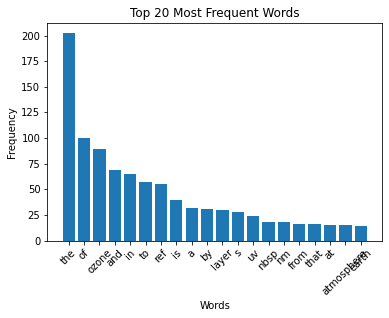

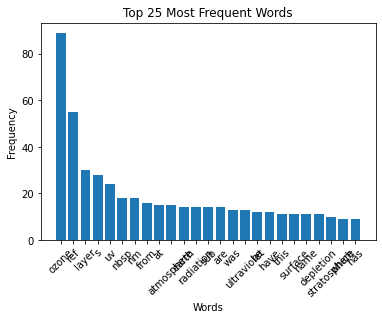

In [9]:
### Step 9: Visualize Filtered Frequencies

# Visualize the 25 most frequent words in the filtered collection.

# Main Execution
data = get_content("Ozone_layer")
merge_content = merge_contents(data)
collection = tokenize(merge_content)
collection = lower_collection(collection)
frequencies = count_frequency(collection)

print_most_frequent(frequencies, 10)
plot_frequencies(frequencies, 20)

filtered_collection = remove_stop_words(collection, stop_words)
filtered_frequencies = count_frequency(filtered_collection)
plot_frequencies(filtered_frequencies, 25)
### Conclusion

# This code provides a basic framework for building a search engine using the content of a Wikipedia article. You can further enhance this by implementing additional features like stemming, more sophisticated tokenization, or integrating with a database for storing and retrieving articles.